# Determining at which age a person is most likely to commit sucide.

### Importing the relevent libraries

In [324]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.
from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt # plotting.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler  # Perform the feature scaling.
from sklearn.linear_model import LogisticRegression  # Performs logistic regression.
from sklearn.metrics import confusion_matrix  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.

### Importing the dataframe

In [232]:
sucidedataframe = pd.read_csv("who_suicide_statistics.csv")  # opens csv files and assighns them to a variable.

### Checking the data from the dataframe before pre-processing

In [233]:
sucidedataframe.head(1)  # Taking a look at the dataframe the first elements of the dataset.

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0


In [234]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


## 1. Data pre-processing

In [235]:
sucidedataframe.columns  # The columns of the dataframe are viewed.

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [236]:
# Below relevent data is selected that will be used in this project.
sucidedataframe = sucidedataframe[["age", "sex", "population", "suicides_no", "suicides_no"]]
sucidedataframe.head(1)  # Taking a look at the dataframe to see if the needed changes have been made.

,age,sex,population,suicides_no,suicides_no
0,15-24 years,female,277900.0,NaN,NaN


In [237]:
# Below the col names are renamed.
sucidedataframe = sucidedataframe.set_axis(["Age", "Gender", "Population", "Suicide_Committed_num", "Suicide_Committed"],axis=1)
sucidedataframe.head(1)  # Taking a look at the dataframe to see if the needed changes have been made.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
0,15-24 years,female,277900.0,NaN,NaN


In [238]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(43776, 5)

### Dealing with null values

In [239]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Age                         0
Gender                      0
Population               5460
Suicide_Committed_num    2256
Suicide_Committed        2256
dtype: int64

In [240]:
print('The age range 5-14 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '5-14 years'])) + ' times.')
print('The age range 15-24 years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '15-24 years'])) + ' times.')
print('The age range 25-34 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '25-34 years'])) + ' times.')
print('The age range 35-54 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '35-54 years'])) + ' times.')
print('The age range 55-74 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '55-74 years'])) + ' times.')
print('The age range 75+ years years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '75+ years'])) + ' times.')

The age range 5-14 years years years appears 7296 times.
The age range 15-24 years appears 7296 times.
The age range 25-34 years years appears 7296 times.
The age range 35-54 years years appears 7296 times.
The age range 55-74 years years years appears 7296 times.
The age range 75+ years years years years appears 7296 times.


In [241]:
sucidedataframe = sucidedataframe.dropna() # droping all rows with at least one null values.

In [242]:
print('The age range 5-14 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '5-14 years'])) + ' times.')
print('The age range 15-24 years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '15-24 years'])) + ' times.')
print('The age range 25-34 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '25-34 years'])) + ' times.')
print('The age range 35-54 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '35-54 years'])) + ' times.')
print('The age range 55-74 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '55-74 years'])) + ' times.')
print('The age range 75+ years years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '75+ years'])) + ' times.')

The age range 5-14 years years years appears 6010 times.
The age range 15-24 years appears 6010 times.
The age range 25-34 years years appears 6010 times.
The age range 35-54 years years appears 6010 times.
The age range 55-74 years years years appears 6010 times.
The age range 75+ years years years years appears 6010 times.


In [243]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(36060, 5)

In [244]:
sucidedataframe.describe().round()  # Shows the count, mean, std, min, 25%, 50%, 75% and 
                                    # max of a datframe. Could be useful for feature scaling afterwords.

,Population,Suicide_Committed_num,Suicide_Committed
count,36060.0,36060.0,36060.0
mean,1699996.0,222.0,222.0
std,3697811.0,855.0,855.0
min,259.0,0.0,0.0
25%,80566.0,2.0,2.0
50%,375765.0,21.0,21.0
75%,1344900.0,116.0,116.0
max,43805214.0,22338.0,22338.0


In [245]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    36060 non-null  object 
 1   Gender                 36060 non-null  object 
 2   Population             36060 non-null  float64
 3   Suicide_Committed_num  36060 non-null  float64
 4   Suicide_Committed      36060 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.7+ MB


In [246]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Age                      0
Gender                   0
Population               0
Suicide_Committed_num    0
Suicide_Committed        0
dtype: int64

In [247]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0.0        5936
1.0        2146
2.0        1489
3.0        1129
4.0         907
           ... 
20705.0       1
21063.0       1
21262.0       1
21706.0       1
22338.0       1
Length: 2231, dtype: int64


### initial plot to visulize the data before working on it.

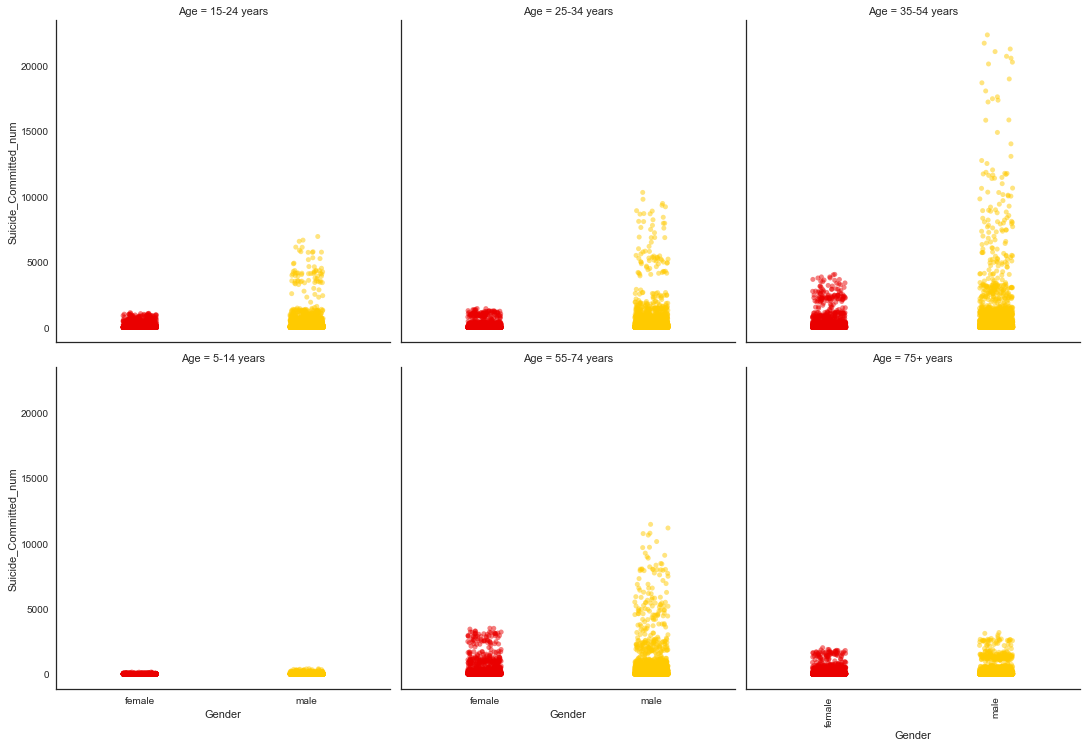

In [248]:
plt.rcParams['figure.figsize'] = (13, 7)
plt.style.use('seaborn-white')
sns.catplot(x='Gender', y="Suicide_Committed_num", col="Age", col_wrap=3, sharey=True, data=sucidedataframe, alpha=0.5, palette = 'hot')
plt.xticks(rotation = 90)
plt.show()

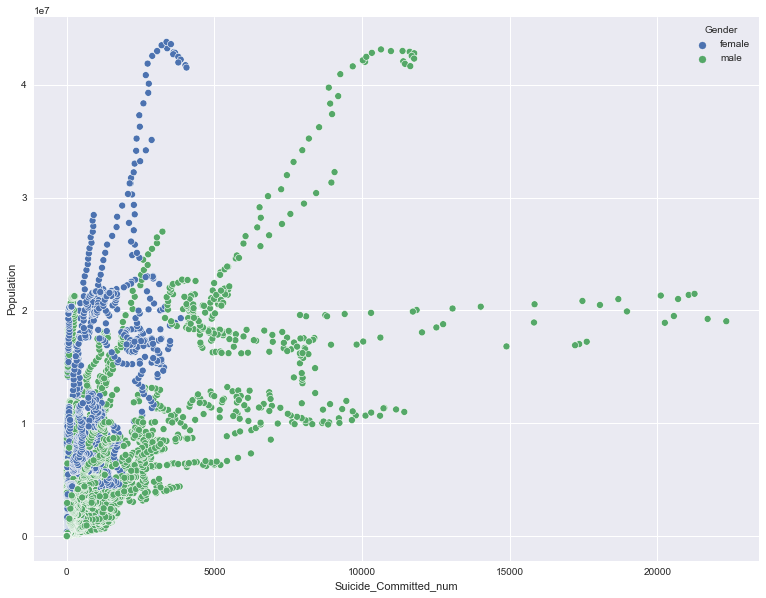

In [249]:
plt.style.use('seaborn')
plt.figure(figsize= (13,10))
sns.scatterplot(x= 'Suicide_Committed_num', y= 'Population', data = sucidedataframe, hue = 'Gender')
plt.show()

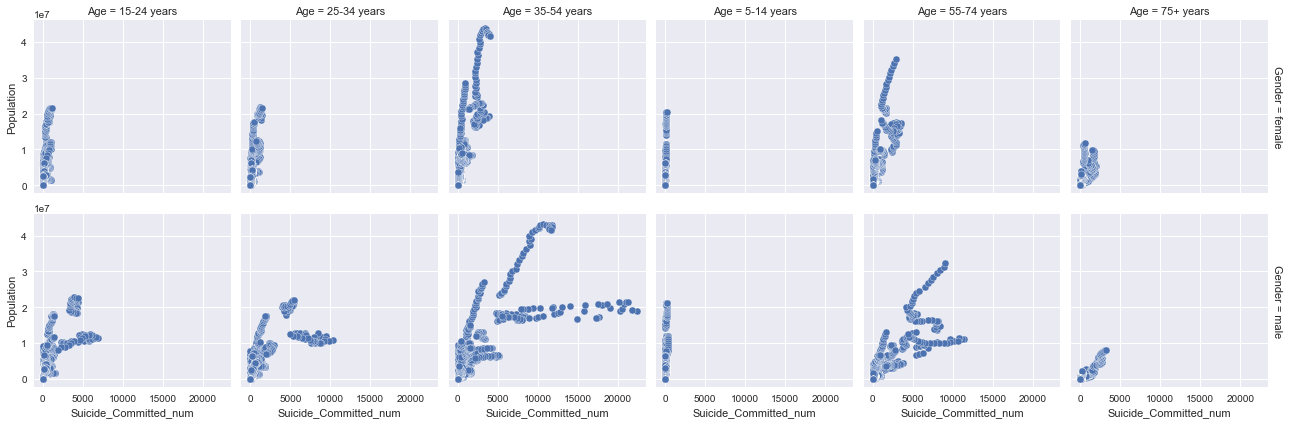

In [250]:
My_plot_object = sns.FacetGrid(sucidedataframe , row = 'Gender',col = 'Age',margin_titles=True)
My_plot_object.map(plt.scatter,"Suicide_Committed_num",'Population',edgecolor = 'w')
plt.show()

### Encoding variables to  0 and 1

In [251]:
le = LabelEncoder()
sucidedataframe.Gender = le.fit_transform(sucidedataframe.Gender)

In [252]:
sucidedataframe.head()

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,14.0
25,25-34 years,0,257200.0,4.0,4.0
26,35-54 years,0,278800.0,6.0,6.0
27,5-14 years,0,311000.0,0.0,0.0
28,55-74 years,0,144600.0,0.0,0.0


In [253]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0.0        5936
1.0        2146
2.0        1489
3.0        1129
4.0         907
           ... 
20705.0       1
21063.0       1
21262.0       1
21706.0       1
22338.0       1
Length: 2231, dtype: int64


In [254]:
sucidedataframe.loc[sucidedataframe.Suicide_Committed > 0, "Suicide_Committed"] = 1  # Encoding everthig above 0 to 1.

In [255]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0.0     5936
1.0    30124
dtype: int64


In [256]:
sucidedataframe['Suicide_Committed'] = sucidedataframe['Suicide_Committed'].astype(np.int64)  # converting float to int.

In [257]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0     5936
1    30124
dtype: int64


### selecting X and Y values 

In [258]:
X = sucidedataframe.iloc[:, 0:3].values  # selecting the values for the X variable.

In [259]:
Y = sucidedataframe[["Suicide_Committed"]].to_numpy()  # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.

In [260]:
sucidedataframe.head(3)

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1
26,35-54 years,0,278800.0,6.0,1


In [261]:
sucidedataframe.head()  # Taking a look at the dataframe the first elements of the dataset.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1
26,35-54 years,0,278800.0,6.0,1
27,5-14 years,0,311000.0,0.0,0
28,55-74 years,0,144600.0,0.0,0


In [262]:
sucidedataframe.head()  # Taking a look at the dataframe the first elements of the dataset.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1
26,35-54 years,0,278800.0,6.0,1
27,5-14 years,0,311000.0,0.0,0
28,55-74 years,0,144600.0,0.0,0


In [263]:
print(X)  # Printing numpy array X.

[['15-24 years' 0 289700.0]
 ['25-34 years' 0 257200.0]
 ['35-54 years' 0 278800.0]
 ...
 ['5-14 years' 1 7291.0]
 ['55-74 years' 1 12615.0]
 ['75+ years' 1 2496.0]]


In [264]:
print(Y)  # Printing numpy array Y.

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


### One Hot Encoding

In [265]:
# count duplicates function learned from: https://datatofish.com/count-duplicates-pandas/
sucidedataframe.pivot_table(columns=['Age'], aggfunc='size')  # counts duplicates in the selected dataframe column.

Age
15-24 years    6010
25-34 years    6010
35-54 years    6010
5-14 years     6010
55-74 years    6010
75+ years      6010
dtype: int64

In [266]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')    
# transformers= [('what to do', method , [index of column to apply method on])]
# remainder='what to do with the remaining columns'

X = np.array(ct.fit_transform(X))  # applies the above method on the given array.

In [267]:
print(X)  # Printing numpy array X.

[[1.0 0.0 0.0 ... 0.0 0 289700.0]
 [0.0 1.0 0.0 ... 0.0 0 257200.0]
 [0.0 0.0 1.0 ... 0.0 0 278800.0]
 ...
 [0.0 0.0 0.0 ... 0.0 1 7291.0]
 [0.0 0.0 0.0 ... 0.0 1 12615.0]
 [0.0 0.0 0.0 ... 1.0 1 2496.0]]


In [268]:
X = np.delete(X, -1, 1)  # delete second column of C

In [269]:
print(X)  # Printing numpy array Y.

[[1.0 0.0 0.0 ... 0.0 0.0 0]
 [0.0 1.0 0.0 ... 0.0 0.0 0]
 [0.0 0.0 1.0 ... 0.0 0.0 0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 1]
 [0.0 0.0 0.0 ... 1.0 0.0 1]
 [0.0 0.0 0.0 ... 0.0 1.0 1]]


In [270]:
sucidedataframe.head(2)  # Taking a look at the dataframe the first elements of the dataset.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1


### Selecting X2 and Y2 values

In [271]:
X2 = sucidedataframe[["Age","Suicide_Committed_num" ,"Population"]].to_numpy()  # selecting the values for the X2 variable.

In [272]:
Y2 = sucidedataframe[["Gender"]].to_numpy()  # selecting the values for the Y2 variable.

In [273]:
print(X2)  # Printing numpy array X2.

[['15-24 years' 14.0 289700.0]
 ['25-34 years' 4.0 257200.0]
 ['35-54 years' 6.0 278800.0]
 ...
 ['5-14 years' 0.0 7291.0]
 ['55-74 years' 0.0 12615.0]
 ['75+ years' 0.0 2496.0]]


In [274]:
print(Y2)  # Printing numpy array Y2.

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


### One Hot Encoding

In [275]:
X2 = np.array(ct.fit_transform(X2))  # applies the above method on the given array.

In [276]:
print(X2)  # Printing numpy array X2.

[[1.0 0.0 0.0 ... 0.0 14.0 289700.0]
 [0.0 1.0 0.0 ... 0.0 4.0 257200.0]
 [0.0 0.0 1.0 ... 0.0 6.0 278800.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 7291.0]
 [0.0 0.0 0.0 ... 0.0 0.0 12615.0]
 [0.0 0.0 0.0 ... 1.0 0.0 2496.0]]


In [277]:
# %run MyOtherNotebook.ipynb use later to seprate code in note book. if allowed.

## Spliting the datasets into a training and test set 

In [278]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 1)

In [279]:
print("The length of X_train is ",len(X_train), " and the length of Y_train is ", len(Y_train))
print("The length of X_test is ",len(X_test), " and the length of Y_test is ", len(Y_test))

The length of X_train is  28848  and the length of Y_train is  28848
The length of X_test is  7212  and the length of Y_test is  7212


In [280]:
print("The length of X2_train is ",len(X2_train), " and the length of Y2_train is ", len(Y2_train))
print("The length of X2_test is ",len(X2_test), " and the length of Y2_test is ", len(Y2_test))

The length of X2_train is  28848  and the length of Y2_train is  28848
The length of X2_test is  7212  and the length of Y2_test is  7212


In [281]:
print("X_test ", X_test, "\nY_test ", Y_test, "\nX_train ", X_train, "\nY_train ", Y_train)

X_test  [[1.0 0.0 0.0 ... 0.0 0.0 1]
 [0.0 0.0 0.0 ... 0.0 1.0 1]
 [0.0 0.0 0.0 ... 1.0 0.0 1]
 ...
 [0.0 0.0 0.0 ... 1.0 0.0 1]
 [0.0 0.0 1.0 ... 0.0 0.0 0]
 [1.0 0.0 0.0 ... 0.0 0.0 0]] 
Y_test  [[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]] 
X_train  [[0.0 0.0 0.0 ... 1.0 0.0 0]
 [0.0 0.0 0.0 ... 0.0 0.0 1]
 [0.0 0.0 0.0 ... 1.0 0.0 1]
 ...
 [0.0 0.0 1.0 ... 0.0 0.0 1]
 [0.0 0.0 0.0 ... 1.0 0.0 0]
 [0.0 0.0 0.0 ... 0.0 0.0 0]] 
Y_train  [[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


In [282]:
print("X2_test ", X2_test, "\nY2_test ", Y2_test, "\nX2_train ", X2_train, "\nY2_train ", Y2_train)

X2_test  [[1.0 0.0 0.0 ... 0.0 6667.0 11714752.0]
 [0.0 0.0 0.0 ... 1.0 0.0 954.0]
 [0.0 0.0 0.0 ... 0.0 216.0 418200.0]
 ...
 [0.0 0.0 0.0 ... 0.0 217.0 1040500.0]
 [0.0 0.0 1.0 ... 0.0 1.0 94332.0]
 [1.0 0.0 0.0 ... 0.0 16.0 215400.0]] 
Y2_test  [[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]] 
X2_train  [[0.0 0.0 0.0 ... 0.0 4.0 142343.0]
 [0.0 0.0 0.0 ... 0.0 0.0 21500.0]
 [0.0 0.0 0.0 ... 0.0 295.0 2536730.0]
 ...
 [0.0 0.0 1.0 ... 0.0 1067.0 13704169.0]
 [0.0 0.0 0.0 ... 0.0 6.0 465100.0]
 [0.0 0.0 0.0 ... 0.0 2.0 403000.0]] 
Y2_train  [[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


## Feature Scaling 

In [283]:
X2_train[0]

array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4.0, 142343.0], dtype=object)

In [284]:
sc = StandardScaler()  # creating an instance of the object.

X2_train[:, 6:] = sc.fit_transform(X2_train[:, 6:])  # Scaling x_train
X2_test[:, 6:] = sc.transform(X2_test[:, 6:])  # Scaling y_train

In [291]:
print("X2_test ", X2_test,"\n\nX2_train ", X2_train)

X2_test  [[1.0 0.0 0.0 ... 0.0 7.446398944619078 2.6964860977419423]
 [0.0 0.0 0.0 ... 1.0 -0.25757297980246174 -0.45926455223718626]
 [0.0 0.0 0.0 ... 0.0 -0.007976769261730885 -0.3468565752769218]
 ...
 [0.0 0.0 0.0 ... 0.0 -0.006821231249968243 -0.1792061147275755]
 [0.0 0.0 1.0 ... 0.0 -0.2564174417906991 -0.4341080928041526]
 [1.0 0.0 0.0 ... 0.0 -0.23908437161425947 -0.40149182097739977]] 

X2_train  [[0.0 0.0 0.0 ... 0.0 -0.25295082775541117 -0.42117371025323713]
 [0.0 0.0 0.0 ... 0.0 -0.25757297980246174 -0.4537293660529554]
 [0.0 0.0 0.0 ... 0.0 0.0833107336675179 0.22388507696091625]
 ...
 [0.0 0.0 1.0 ... 0.0 0.9753860787482783 3.2324441184308363]
 [0.0 0.0 0.0 ... 0.0 -0.2506397517318859 -0.3342215011972748]
 [0.0 0.0 0.0 ... 0.0 -0.2552619037789365 -0.3509515246588117]]


## Training Logistic regression model on traning and test sets.

### For X_train and Y_train 

In [325]:
logistic_regression_classifier = LogisticRegression(random_state = 0)  # Bulding an opject of the class

In [326]:
logistic_regression_classifier.fit(X_train, Y_train)  # Building logistic regression model.

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

### predicting  result

In [327]:
Y_pred = logistic_regression_classifier.predict(X_test)  # Predicted results.
print("pred-real")
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


### Confusion matrix

In [346]:
cm = confusion_matrix(Y_test, Y_pred)
print("correct_0-incorrct_1\nincorrect_0-correct_1")
print(cm)

correct_0-incorrct_1
incorrect_0-correct_1
[[   0 1219]
 [   0 5993]]


### Getting accurcy of the model

In [333]:
accuracy_score(Y_test, Y_pred)

0.8309761508596784

### For X2_train and Y2_train 

In [334]:
logistic_regression_classifier.fit(X2_train, Y2_train)  # Building logistic regression model.

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

### predicting result

In [337]:
Y2_pred = logistic_regression_classifier.predict(X2_test)  # Predicted results.
print("pred-real")
print(np.concatenate((Y2_pred.reshape(len(Y2_pred),1), Y2_test.reshape(len(Y2_test),1)),1))  # Predicted results and real results in a np array.

pred-real
[[1 1]
 [0 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 0]]


### Confusion matrix

In [344]:
cm2 = confusion_matrix(Y2_test, Y2_pred)
print("correct_0-incorrct_1\nincorrect_0-correct_1")
print(cm2)

correct_0-incorrct_1
incorrect_0-correct_1
[[2611  982]
 [1573 2046]]


### Getting accurcy of the model

In [345]:
accuracy_score(Y2_test, Y2_pred)

0.6457293399889074

In [285]:
# look it up as your about to finish this report.
# (Adeline, 2020) has a very creative idea to compare models at the end.
# you can make it even better by using visusals.ss